In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 38s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

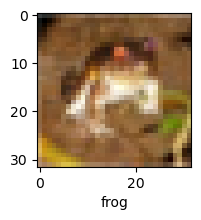

In [10]:
plot_sample(X_train, y_train, 0)

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])


ann.fit(X_train, y_train, epochs=3)

Epoch 1/3


2023-02-27 23:48:27.022390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 31s 20ms/step - loss: 1.8919 - accuracy: 0.3275
Epoch 2/3
1563/1563 [==============================] - 30s 19ms/step - loss: 1.6652 - accuracy: 0.4022
Epoch 3/3
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5787 - accuracy: 0.4334


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

 27/313 [=>............................] - ETA: 1s

2023-02-27 23:50:48.646003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.46      0.48      1000
           1       0.58      0.62      0.60      1000
           2       0.29      0.42      0.34      1000
           3       0.32      0.40      0.36      1000
           4       0.38      0.32      0.35      1000
           5       0.51      0.16      0.24      1000
           6       0.41      0.62      0.49      1000
           7       0.56      0.42      0.48      1000
           8       0.51      0.64      0.56      1000
           9       0.60      0.39      0.47      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.44     10000
weighted avg       0.47      0.44      0.44     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])


In [17]:
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3


2023-02-27 23:52:58.539483: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 20s 12ms/step - loss: 1.4852 - accuracy: 0.4635
Epoch 2/3
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1399 - accuracy: 0.5981
Epoch 3/3
1563/1563 [==============================] - 18s 12ms/step - loss: 1.0002 - accuracy: 0.6517


In [18]:
cnn.evaluate(X_test,y_test)

  8/313 [..............................] - ETA: 2s - loss: 1.0941 - accuracy: 0.6406  

2023-02-27 23:54:36.570935: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 1.0089 - accuracy: 0.6479


[1.0089008808135986, 0.6479000449180603]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

 30/313 [=>............................] - ETA: 1s

2023-02-27 23:54:54.432841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 4ms/step


array([[7.92896841e-03, 3.27586458e-05, 2.38327030e-02, 7.44325519e-01,
        6.16052654e-03, 1.21526532e-01, 5.64134158e-02, 6.38864585e-04,
        3.88000235e-02, 3.40721832e-04],
       [3.18952471e-01, 2.37347677e-01, 5.75834885e-04, 5.29622266e-05,
        1.82582284e-04, 3.59347655e-06, 9.11667394e-06, 2.13554158e-05,
        4.17105585e-01, 2.57488731e-02],
       [2.40133271e-01, 1.61108762e-01, 1.44793345e-02, 1.54427113e-02,
        7.76191475e-03, 1.50869892e-03, 9.77873802e-04, 5.78191457e-03,
        4.54726100e-01, 9.80793759e-02],
       [6.41710281e-01, 6.01747073e-03, 9.18773096e-03, 6.36195473e-04,
        1.11308880e-02, 3.04521254e-05, 1.44956110e-04, 1.28002232e-03,
        3.29332203e-01, 5.29878598e-04],
       [1.27687585e-04, 3.71102360e-05, 4.55003567e-02, 6.81342110e-02,
        5.78320324e-01, 1.34562133e-02, 2.94050902e-01, 1.07461063e-04,
        2.46602256e-04, 1.91552317e-05]], dtype=float32)